In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import models, transforms

In [9]:
# Load Pretrained Segmentation Model
def load_model():
    model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    return model

In [10]:
# Preprocess Image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    return transform(image).unsqueeze(0), image

In [11]:
# Perform Object Detection and Segmentation
def get_segmentation(model, image_tensor, threshold=0.5):
    outputs = model(image_tensor)[0]
    masks = outputs['masks'] > threshold
    boxes = outputs['boxes']
    labels = outputs['labels']
    return masks, boxes, labels

In [12]:
def recolor_object(image, mask, color):
    image = np.array(image)
    mask = mask.astype(bool)  # Ensure mask is boolean
    # Focus only on the region where the shirt is detected (assume the shirt is the largest mask)
    for i in range(3):  # For each color channel (R, G, B)
        image[:, :, i] = np.where(mask, color[i], image[:, :, i])
    return Image.fromarray(image)

In [13]:
# Main Function
def main(image_path, color):
    model = load_model()
    image_tensor, original_image = preprocess_image(image_path)
    masks, boxes, labels = get_segmentation(model, image_tensor)

    recolored_images = []
    for i, mask in enumerate(masks):
        mask = mask.squeeze(0).detach().numpy()
        recolored_image = recolor_object(original_image, mask, color)
        recolored_images.append(recolored_image)

    return recolored_images

In [14]:
# Display Results
def display_images(images):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

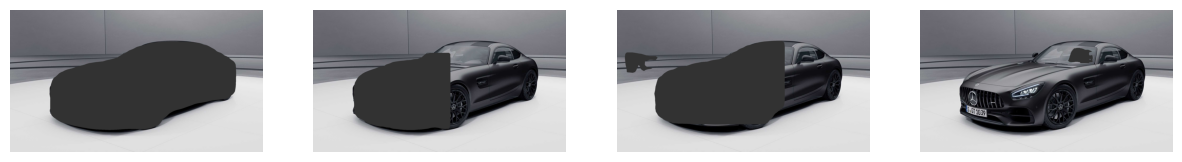

In [18]:
# Example Usage
if __name__ == "__main__":
    image_path = "Generative_fill2.jpg"  # Replace with your image path
    recolor_color = [50, 50, 50]  # Red color for recoloring

    recolored = main(image_path, recolor_color)
    display_images(recolored)